#### 1. Linear Regression Model
The linear regression model is typically written as:

$$
Y = X\beta + \epsilon
$$

Where:
- $ Y $ is the dependent variable (observed outcomes),
- $ X $ is the matrix of independent variables (predictors),
- $ \beta $ is the true vector of coefficients (parameters to be estimated),
- $ \hat{\beta} $ is the estimation of the true vector of coefficients $ \beta $
- $ \epsilon $ is the error term (assumed to be independent and identically distributed).

Minimizing Mean Squared Error $\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i - X_i\hat{\beta})^2$ provides a solution to this problem. In matrix form it can be written as $\hat{\beta} = \arg\min_{\hat{\beta}}\| Y - X \hat{\beta} \|_2^2$

#### 2. MSE as MLE under the assumption of Normality for $ \epsilon $
The mean square error (MSE) loss in linear regression can be interpreted as a specific implementation of maximum likelihood estimation (MLE) under the assumption that the error term follows a normal distribution $ \epsilon \sim \mathcal{N}(0, \sigma^2) $ with mean 0 and variance $ \sigma^2 $.

This implies that $ Y | X \sim \mathcal{N}(X\hat{\beta}, \sigma^2) $, meaning the conditional distribution of $ Y $ given $ X $ is normally distributed with mean $ X\hat{\beta} $ and variance $ \sigma^2 $.

In MLE, we aim to find the parameter $ \hat{\beta} $ that maximizes the likelihood of the observed data.

The likelihood function for the data $ \{Y_i, X_i\}_{i=1}^n $ is:

$$
L(\hat{\beta}, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(Y_i - X_i\hat{\beta})^2}{2\sigma^2}\right)
$$

Taking the natural logarithm to simplify (log-likelihood):

$$
\ell(\hat{\beta}, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i - X_i\hat{\beta})^2
$$

To maximize the log-likelihood with respect to $ \hat{\beta} $:
- The terms $ -\frac{n}{2} \log(2\pi) $ and $ -\frac{n}{2} \log(\sigma^2) $ are constants with respect to $ \hat{\beta} $, so they can be ignored.
- The remaining term to maximize (or equivalently minimize its negative) is:

$$
\frac{1}{2\sigma^2} \sum_{i=1}^n (Y_i - X_i\hat{\beta})^2
$$

Minimizing this is equivalent to minimizing the sum of squared errors (SSE):

$$
\text{SSE} = \sum_{i=1}^n (Y_i - X_i\hat{\beta})^2
$$

Dividing by $ n $ gives the mean squared error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i - X_i\hat{\beta})^2
$$

Thus, minimizing the MSE corresponds to maximizing the likelihood under the assumption of normally distributed errors.

#### 3. Analytical solution
Our loss function is:

$$
RSS(\hat{\beta}) = (y - X\hat{\beta})^T (y - X\hat{\beta})
$$

Expanding this and using the fact that $(u - v)^T = u^T - v^T$, we have:

$$
RSS(\hat{\beta}) = y^T y - y^T X\hat{\beta} - \hat{\beta}^T X^T y + \hat{\beta}^T X^T X \hat{\beta}.
$$

Noting that $y^T X\hat{\beta}$ is a scalar, and for any scalar $r \in \mathbb{R}$ we have $r = r^T$, it follows that:

$$
y^T X\hat{\beta} = (y^T X\hat{\beta})^T = \hat{\beta}^T X^T y.
$$

So, all together:

$$
RSS(\hat{\beta}) = y^T y - 2\hat{\beta}^T X^T y + \hat{\beta}^T X^T X \hat{\beta}.
$$

*Note: If you are not familiar with matrix calculus, see this [cookbook](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf) by Barnes (2006) with detailed derivations before proceeding with the next steps.*

Now we'll differentiate $RSS(\hat{\beta})$ with respect to $\hat{\beta}$:

$$
\frac{\partial RSS}{\partial \hat{\beta}} = \frac{\partial}{\partial \hat{\beta}} y^T y - 2 \frac{\partial}{\partial \hat{\beta}} \hat{\beta}^T X^T y + \frac{\partial}{\partial \hat{\beta}} \hat{\beta}^T X^T X \hat{\beta}.
$$

Since $y^T y$ is constant with respect to $\hat{\beta}$, its derivative is 0. The other terms simplify as follows:
- $-2 \frac{\partial}{\partial \hat{\beta}} (\hat{\beta}^T X^T y) = -2 X^T y$,
- $\frac{\partial}{\partial \hat{\beta}} (\hat{\beta}^T X^T X \hat{\beta}) = 2 X^T X \hat{\beta}$.

Combining these results:

$$
\frac{\partial RSS}{\partial \hat{\beta}} = 0 - 2 X^T y + 2 X^T X \hat{\beta}.
$$

We want to minimize $RSS(\hat{\beta})$, so we set the derivative equal to zero:

$$
\frac{\partial RSS}{\partial \hat{\beta}} = 0 \implies -2 X^T y + 2 X^T X \hat{\beta} = 0.
$$

Simplify:

$$
X^T y - X^T X \hat{\beta} = 0 \implies X^T (y - X\hat{\beta}) = 0.
$$

Now we assume that $X$ is full column rank, which ensures that $X^T X$ is positive definite and therefore invertible. This allows us to solve for $\hat{\beta}$ known as the Ordinary Least Squares (OLS) estimator:

$$
X^T y = X^T X \hat{\beta} \implies \hat{\beta} = (X^T X)^{-1} X^T y.
$$

#### 4. Gauss-Markov theorem
On the linear regression model defined above 
$$
Y = X\beta + \epsilon
$$
we impose Gauss-Markov assumptions:
- $ \mathbb{E}(\varepsilon_i) = 0 \quad \forall i $
- $ \text{Var}(\varepsilon_i) = \sigma^2 < \infty \quad \forall i $
- $ \text{Cov}(\varepsilon_i, \varepsilon_j) = 0 \quad \forall i \neq j $

which ensure that the OLS analytical solution in the form of $\hat{\beta} = (X^T X)^{-1} X^T Y$ is the *Best Linear Unbiased Estimator (BLUE)*.

Let's go through each part of the definition of the BLUE estimator and see why it applies to our linear regression model.

The term **linear** in BLUE means that $\hat{\beta}$ is a linear function of the response vector $Y$. That is, each estimated coefficient in $\hat{\beta}$ is a weighted sum of the observed responses represented as $\hat{\beta} = AY$. By definition, the OLS estimator is $\hat{\beta} = (X^T X)^{-1} X^T Y$, making it a linear estimator.

Model bias in this context refers to the variability of the estimator value based on the selection of training samples and its deviation from the true vector of coefficients. Thus, to prove the **unbiased** property, we want to show that the expected value of the estimator is equal to the true one, i.e. $\mathbb{E}[\hat{\beta}] = \beta$

Taking expectations:

$$
\mathbb{E}[\hat{\beta}] = \mathbb{E}[(X^TX)^{-1} X^T Y]
$$

Since $X$ does not depend on $\beta$, it can taken out of the expectation expression:

$$
\mathbb{E}[\hat{\beta}] = (X^TX)^{-1} X^T \mathbb{E}[Y]
$$

Substituting $ Y = X\beta + \epsilon $:

$$
\mathbb{E}[\hat{\beta}] = (X^TX)^{-1} X^T \mathbb{E}[X\beta + \epsilon] = (X^TX)^{-1} X^T (\mathbb{E}[X\beta] + \mathbb{E}[\epsilon]) = (X^TX)^{-1} X^T (X\mathbb{E}[\beta] + \mathbb{E}[\epsilon])
$$

Applying the assumption that $ \mathbb{E}(\varepsilon_i) = 0 \quad \forall i $ or equivalently $\mathbb{E}(\epsilon) = \mathbf{0}$:

$$
\mathbb{E}[\hat{\beta}] = (X^TX)^{-1} X^T (X\mathbb{E}[\beta] + \mathbf{0}) = (X^TX)^{-1} X^T X\mathbb{E}[\beta] = (X^TX)^{-1} (X^T X)\mathbb{E}[\beta] = \mathbb{E}[\beta] = \beta
$$

Thus, $\mathbb{E}[\hat{\beta}] = \beta$, proving the unbiasadness of our estimator.

The **best** property states that the Ordinary Least Squares (OLS) estimator has the minimum variance among all linear unbiased estimators.

The variance of $\hat{\beta}$ is:

$$
\text{Var}(\hat{\beta}) = \text{Var}((X^TX)^{-1} X^T Y)
$$

which, applying the fact that $(X^TX)^{-1} X^T$ is a constant matrix, can be rewritten using $\text{Var}(AY) = A\text{Var}(Y)A^T$ as

$$
\text{Var}(\hat{\beta}) = (X^TX)^{-1} X^T Var(Y) ((X^TX)^{-1} X^T)^T
$$
Expanding the expression for $\text{Var(Y)}$:
$$
\text{Var(Y)} = \text{Var}(X\beta + \epsilon) = \text{Var}(X\beta) + \text{Var}(\epsilon) + \text{Cov}(X\beta, \epsilon) + \text{Cov}(\epsilon, X\beta) 
$$

Since $X\beta$ is  a constant vector, $\text{Var}(X\beta)$, $\text{Cov}(X\beta, \epsilon)$, and $\text{Cov}(\epsilon, X\beta)$ are all zero matrices. Thus,

$$
\text{Var(Y)} = \text{Var}(\epsilon)
$$

which is a matrix, whose diagonal elements are variances $\text{Var}(e_i)$ of each of the error terms, and off-diagonal elements are their covariances $\text{Cov}(e_i, e_j)$. Based on the assumptions of the theorem that  $\text{Var}(\varepsilon_i) = \sigma^2 < \infty \quad \forall i $ and $ \text{Cov}(\varepsilon_i, \varepsilon_j) = 0 \quad \forall i \neq j $, we realize that this is a diagonal matrix with $\sigma^2$ as its diagonal elements. In other words,
$$
\text{Var}(Y) = \sigma^2 I
$$

Thus,

$$
\text{Var}(\hat{\beta}) = (X^TX)^{-1} X^T \sigma^2 I ((X^TX)^{-1} X^T)^T = \sigma^2(X^TX)^{-1} X^T ((X^TX)^{-1} X^T)^T = \sigma^2(X^TX)^{-1}
$$

To show that this variance produced by the estimator $\hat{\beta}$ is the smallest among all linear unbiased estimator variances, let's analyze some arbitrary linear unbiased estimator 
$\hat{\beta}^*$, which can be represented as 

$$
\hat{\beta}^* = (A + (X^TX)^{-1} X^T) Y
$$

For it to be unbiased, i.e.

$$
\mathbb{E}[\hat{\beta}^*] = \mathbb{E}[(A + (X^TX)^{-1} X^T) Y] = (A + (X^TX)^{-1} X^T)\mathbb{E}[Y] = (A + (X^TX)^{-1} X^T)(X\beta) = (AX + I)\beta
$$

$AX$ must be $\mathbf{0}$, based on which $\hat{\beta}^*$ can be rewritted as

$$
\hat{\beta}^* = \beta + (A + (X^TX)^{-1} X^T)\epsilon
$$

Obtaining the variance for $\hat{\beta}^*$:

$$
\text{Var}(\hat{\beta}^*) = \mathbb{E}[A + (X^TX)^{-1} X^T]\epsilon \epsilon^T [A + (X^TX)^{-1} X^T]^T =(A + (X^TX)^{-1} X^T)\mathbb{E}(\epsilon \epsilon^T) (A + (X^TX)^{-1} X^T)^T 
$$

Based on the assumption that $\text{Var}(\varepsilon_i) = \sigma^2 < \infty \quad \forall i$ and $\text{Cov}(\varepsilon_i, \varepsilon_j) = 0 \quad \forall i \neq j$, 
$$
\mathbb{E}(\epsilon \epsilon^T) = \sigma^2I
$$

and

$$
\text{Var}(\hat{\beta}^*) = \sigma^2(AA^T + (X^TX)^{-1}) = \sigma^2(X^TX)^{-1} + AA^T\sigma^2 = \text{Var}(\hat{\beta}) + AA^T\sigma^2
$$

We want to measure the variance of the estimators when applied to an unknown object $a$, i.e. $\text{Var}(a^T\beta))$. We use the property that for a constant vector $a$ and a random vector $\beta$, 

$$
\text{Var}(a^T\beta) = a^T \text{Var}(\beta) a
$$

Thus,

$$
\text{Var}(a^T\hat{\beta}) = a^T\text{Var}(\hat{\beta})a
$$

and

$$
\text{Var}(a^T\hat{\beta}^*) = a^T\text{Var}(\hat{\beta}^*)a = a^T (\text{Var}(\hat{\beta}) + AA^T\sigma^2) a = a^T\text{Var}(\hat{\beta})a + a^TAA^T\sigma^2a = \text{Var}(a^T\hat{\beta}) + \sigma^2a^TAA^Ta =
$$

$$
= \text{Var}(a^T\hat{\beta}) + \sigma^2(a^TA)(a^TA)^T
$$
Thus, 

$$
\text{Var}(a^T\hat{\beta}^*) \geq \text{Var}(a^T\hat{\beta})
$$

proving that the OLS estimator is indeed the best linear unbiased estimator.

#### 5. Unstable solution and regularization

In the *Analytical solution* section, we made an assumption about the invertability of $X^T X$. How would our solution behave when this assumption fails?

Let's generate the true underlying weights vector and two feature matrices: one with linearly indepent and one with correlated features (for the ease of illustration, we use two features only). 

In [47]:
import numpy as np

random_seed = 11

n_features = 4
n_objects = 200

np.random.seed(random_seed)

# The true weights vector
b_true = np.random.normal(size=(n_features, ))

# Feature matrix with linearly independent features
X = np.random.uniform(-7, 7, size=(n_objects, n_features))
# Put the features into different scales (1, 10, 100, ...)
X *= np.logspace(0, n_features-1, num=n_features)[np.newaxis, :]

# The true target vector
Y = X.dot(b_true) + np.random.normal(0, 1, size=(n_objects, ))

# The analytical solution
b_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Comparing the solution with the true vector
print(f"b_true: {b_true}\nb_hat: {b_hat}")


b_true: [ 1.74945474 -0.286073   -0.48456513 -2.65331856]
b_hat: [ 1.75765169 -0.28746913 -0.4844455  -2.65331009]


In [48]:
# Feature matrix with colinear features obtained by copying the n-1_th feature into the n_th feature and adding a small noise
noise = 1e-3
X[:, -1] = X[:, -2] + np.random.uniform(-noise, noise, size=X[:, -2].shape)

# The true target vector
Y = X.dot(b_true) + np.random.normal(0, 1, size=(n_objects, ))

# The analytical solution
b_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# Comparing the solution with the true vector
print(f"b_true: {b_true}\nb_hat: {b_hat}")


b_true: [ 1.74945474 -0.286073   -0.48456513 -2.65331856]
b_hat: [  1.96462233  -0.28912037   8.85350191 -11.9916626 ]


We see that in the case of colinear features, the solution produced is highly unstable. To fix this, we want to tweak the origianl $X^TX$ matrix to make invertible, and one of the of the ways to judge the invertebility of the matrix is by looking at its eigenvalues: a singular matrix must have at least one zero eigenvalue. The crucial property we will prove and use is that positive semi-definite matrices, which $X^TX$ is, have non-negative eigenvalues.

Let $A$ be a positive semidefinite matrix. By definition, for any non-zero vector $x \in \mathbb{R}^n$, we have:
$$
x^T A x \geq 0.
$$

Let $\lambda$ be an eigenvalue of $A$ and $v$ be the corresponding eigenvector. Then:
$$
A v = \lambda v
$$

Multiply both sides by $v^T$:
$$
v^T A v = v^T (\lambda v) = \lambda v^T v.
$$

Since $v$ is an eigenvector, $v \neq 0$, and thus $v^T v > 0$. Therefore:
$$
v^T A v = \lambda v^T v.
$$

Because $A$ is positive semidefinite, $v^T A v \geq 0$. Substituting, we get:
$$
\lambda v^T v \geq 0.
$$

Since $v^T v > 0$, $\lambda$ must also be non-negative, thereby proving the desired property.

$X^TX$ is a symmetric matrix, which according to the Spectral Theorem can be decomposed into $Q\Lambda Q^T$, where $\Lambda$ is a diagonal matrix of its eigenvalues, which we proved to be all non-negative, and $Q^T = Q^{-1}$. As we said, to make $X^TX$ invertible, we must make all its eigenvalues non-zero, and since they are all non-negative, we should only take care of zero eigenvalues. 

Take a diagonal matrix $\tilde{\lambda}I$, where $\tilde{\lambda}$ an arbitrary positive number $\tilde{\lambda}$, which can be rewritten as $\tilde{\lambda}I = \tilde{\lambda}QQ^{-1} = {\lambda}QQ^T $, where $Q$ is the same as above. Now, adding it to the matrix of interest:

$$
X^TX + \tilde{\lambda}I = Q\Lambda Q^T + \tilde{\lambda}QQ^T = Q (\Lambda + \tilde{\lambda}I) Q^T
$$

Since $\tilde{\lambda}$ is positive and the diagonal values of $\Lambda$ are all non-negative, $\Lambda + \tilde{\lambda}I$ must be a diagonal matrix of all positive values, thus the matrix $X^TX + \tilde{\lambda}I$ is invertible.

It turns out that the new matrix is an analytical solution for the L2 regularization problem:

$$
\hat{\beta} = \arg\min_{\hat{\beta}} (\|Y - X \hat{\beta} \|_2^2 + \lambda^2 \| \hat{\beta} \|_2^2)
$$

which can be derived in a way analogous to that in the *Analytical solution* section.



#### 6. Gradient descent
Invertion of the matrix $X^TX$ (or $X^TX + \hat{\lambda} I$ in case of applied regularization) in the analytical solution is a computationally expensive task for large datasets (one of the reasons being simply that the whole dataset won't fit into the memory at once). Thus, we resort to the numerical solution of gradient descent. This method is based on the derivative of the loss funciton, and thus it is assumed that the loss funciton is differentiable with respect to its parameters. The key property of the funciton gradient is that it points in the direction of the steepest increase:

The gradient of a scalar-valued function $f(x)$, where $x \in \mathbb{R}^n$, is defined as:
$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right).
$$
This is a vector in $\mathbb{R}^n$.

The directional derivative of $f(x)$ in the direction of a unit vector $u$ (where $\|u\| = 1$) is defined as:
$$
D_{u} f(x) = \lim_{h \to 0} \frac{f(x + hu) - f(x)}{h}.
$$
This measures the rate of change of $f$ in the direction of $u$.

To express the directional derivative in terms of the gradient, we use the multivariable Taylor expansion of $f(x + hu)$ around $x$:
$$
f(x + hu) = f(x) + h \nabla f(x) \cdot u + \mathcal{O}(h^2),
$$
where:
- $\nabla f(x)$ is the gradient of $f$ at $x$,
- $\mathcal{O}(h^2)$ represents higher-order terms that vanish as $h \to 0$.

Substituting this into the definition of the directional derivative:
$$
D_{u} f(x) = \lim_{h \to 0} \frac{f(x + hu) - f(x)}{h}.
$$

Using the Taylor expansion:
$$
D_{u} f(x) = \lim_{h \to 0} \frac{f(x) + h \nabla f(x) \cdot u + \mathcal{O}(h^2) - f(x)}{h}.
$$

Simplifying the numerator:
$$
D_{u} f(x) = \lim_{h \to 0} \frac{h \nabla f(x) \cdot u + \mathcal{O}(h^2)}{h}.
$$

Dividing through by $h$:
$$
D_{u} f(x) = \lim_{h \to 0} \left( \nabla f(x) \cdot u + \frac{\mathcal{O}(h^2)}{h} \right).
$$

As $h \to 0$, the term $\frac{\mathcal{O}(h^2)}{h}$ vanishes, leaving:
$$
D_{u} f(x) = \nabla f(x) \cdot u.
$$

Thus, the directional derivative is the dot product of the gradient $\nabla f(x)$ and the unit vector $u$.

To find the direction $u$ in which $f$ increases the fastest, we maximize the directional derivative $D_{u} f(x)$. Using the expression above:
$$
D_{u} f(x) = \nabla f(x) \cdot u.
$$

The dot product $\nabla f(x) \cdot u$ is maximized when $u$ points in the same direction as $\nabla f(x)$. This is because the dot product of two vectors is maximized when they are aligned.

The dot product $\nabla f(x) \cdot u$ can be written as:
$$
\nabla f(x) \cdot u = \|\nabla f(x)\| \cdot \|u\| \cdot \cos \theta,
$$
where:
- $\|\nabla f(x)\|$ is the magnitude of the gradient,
- $\|u\| = 1$ (since $u$ is a unit vector),
- $\theta$ is the angle between $\nabla f(x)$ and $u$.

The maximum value of $\cos \theta$ is $1$, which occurs when $\theta = 0$. This means the directional derivative is maximized when $u$ points in the same direction as $\nabla f(x)$.

Since our task is to find the set of parameters that minimize loss function $J$, we can update the weights at each step by making a small step in the direction opposite to that of the loss function gradient, thereby moving along the line of the steepest descent:

$$
\beta^{(t+1)} = \beta^{(t)} - \eta_t \nabla J(\beta^{(t)}) 
$$

where $\eta_t$ is a hyperparameter denoting the learning rate of the model.

The gradient descent of the MSE loss function takes the following form:

$$
\nabla J(\beta) = 2X^T(X\beta - Y)
$$

Let's visualize the trajectory of the weights for both classical gradient descent and stochastic gradient descent (a more efficient implementation that at each step computes the gradient over some random subset) methods:

In [63]:
import matplotlib
import matplotlib.pyplot as plt

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
np.random.seed(random_seed)

# The true weights vector
b_true = np.random.normal(size=(n_features, ))

# Feature matrix with linearly independent features
X = np.random.uniform(-5, 5, size=(n_objects, n_features))
# Put the features into different scales (1, 10, 100, ...)
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] 

# The true target vector
Y = X.dot(b_true) + np.random.normal(0, 1, size=(n_objects, ))

In [ ]:
# Classical Gradient Descent

# The initial weights
b = np.random.uniform(-2, 2, n_features) - 0.5

# The list that will store the progression of the weights
b_list = [b.copy()]
step_size = 1e-2

# The classical gradient descent
for i in range(num_steps):
    b -= step_size * 2. * (X.T).dot(X.dot(b) - Y) / Y.size
    b_list.append(b.copy())

b_array = np.array(b_list)

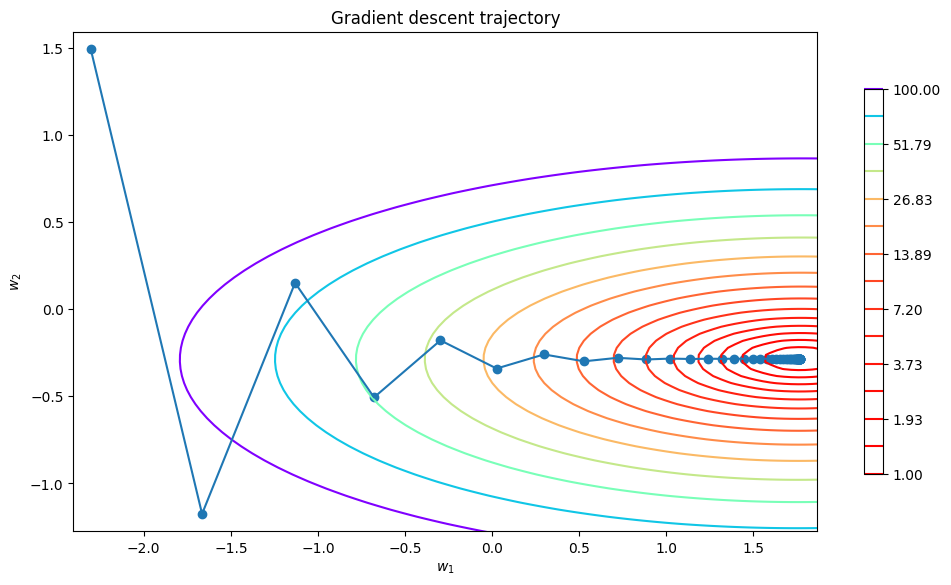

In [69]:
# Outlying the space of potential weight vectors
b_1, b_2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

# Calculating the MSE loss for all the potential weight vectors
contours = np.empty_like(b_1)

for i in range(b_1.shape[0]):
    for j in range(b_1.shape[1]):
        b_tmp = np.array([b_1[i, j], b_2[i, j]])
        contours[i, j] = np.mean(np.power((X.dot(b_tmp) - Y), 2))

# Plotting the weight vectors space along with the obtained solution trajectory and the true weights
plt.figure(figsize=(12, 10))
plt.title("Gradient descent trajectory")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(b_array[:, 0].min() - 0.1, b_array[:, 0].max() + 0.1)
plt.ylim(b_array[:, 1].min() - 0.1, b_array[:, 1].max() + 0.1)
plt.gca().set_aspect("equal")

contour_plot = plt.contour(b_1, b_2, contours, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
plt.colorbar(contour_plot, shrink=0.5)

plt.scatter(b_true[0], b_true[1], c='r')
plt.scatter(b_array[:, 0], b_array[:, 1])
plt.plot(b_array[:, 0], b_array[:, 1])

plt.show()

In [86]:
# Stochastic Gradient Descent

# The initial weights
b = np.random.uniform(-2, 2, n_features) - 0.5

# The list that will store the progression of the weights
b_list = [b.copy()]
step_size = 1e-2

# The classical gradient descent
for i in range(2 * num_steps):
    batch_indices = np.random.randint(0, n_objects, batch_size)
    X_batch = X[batch_indices, :]
    Y_batch = Y[batch_indices]
    b -= step_size * 2. * (X_batch.T).dot(X_batch.dot(b) - Y_batch) / batch_size
    b_list.append(b.copy())

b_array = np.array(b_list)

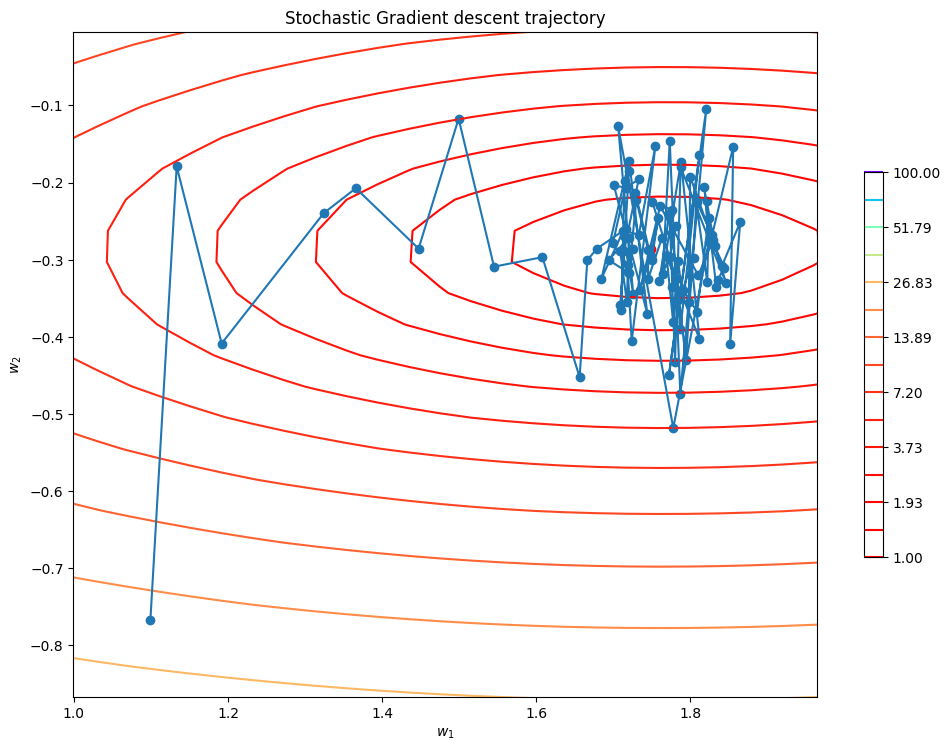

In [87]:
# Outlying the space of potential weight vectors
b_1, b_2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

# Calculating the MSE loss for all the potential weight vectors
contours = np.empty_like(b_1)

for i in range(b_1.shape[0]):
    for j in range(b_1.shape[1]):
        b_tmp = np.array([b_1[i, j], b_2[i, j]])
        contours[i, j] = np.mean(np.power((X.dot(b_tmp) - Y), 2))

# Plotting the weight vectors space along with the obtained solution trajectory and the true weights
plt.figure(figsize=(12, 10))
plt.title("Stochastic Gradient descent trajectory")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(b_array[:, 0].min() - 0.1, b_array[:, 0].max() + 0.1)
plt.ylim(b_array[:, 1].min() - 0.1, b_array[:, 1].max() + 0.1)
plt.gca().set_aspect("equal")

contour_plot = plt.contour(b_1, b_2, contours, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
plt.colorbar(contour_plot, shrink=0.5)

plt.scatter(b_true[0], b_true[1], c='r')
plt.scatter(b_array[:, 0], b_array[:, 1])
plt.plot(b_array[:, 0], b_array[:, 1])

plt.show()

The trajectory for the SGD looks less pretty, as if the solution wanders back and forth around the minima - the behavior that is controlled by the step size hyperparameter $\eta_t $. In the general case, the convergence of the SGD is not guaranteed.